<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta

import os
import re

from functools import reduce 
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

import prophet as pr

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales_vs_discount.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'online_retail_II.xlsx',
 'groceries.csv',
 'sales.csv',
 'sample-sales-data.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'match_result_test.csv',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_data_with_stores.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sample_data']

In [5]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.columns = ['_'.join(re.split(r'(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower() for a in df.columns]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df = df[(~df.invoice_no.str.contains('C')) & (df.country == 'United Kingdom')]
df.invoice_date = pd.to_datetime(df.invoice_date, infer_datetime_format=True)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['rev'] = df.unit_price * df.quantity

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,date,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [11]:
cnt = df.groupby(['date'])['rev'].sum().reset_index().rename(columns = {'date':'ds', 'rev':'y'})
cnt.head()

,ds,y
0,2010-12-01,54818.08
1,2010-12-02,47570.53
2,2010-12-03,41308.69
3,2010-12-05,25853.20
4,2010-12-06,53322.12


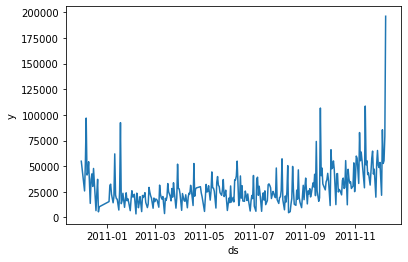

In [13]:
sns.lineplot(data = cnt, x = 'ds', y = 'y')

In [14]:
m = pr.Prophet().fit(cnt)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf51rpdfd/jeeqdp1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf51rpdfd/n53qbvyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64877', 'data', 'file=/tmp/tmpf51rpdfd/jeeqdp1s.json', 'init=/tmp/tmpf51rpdfd/n53qbvyp.json', 'output', 'file=/tmp/tmpf51rpdfd/prophet_modeldhq7rp0x/prophet_model-20221107225339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods = 30)
future.tail()

,ds
330,2012-01-04
331,2012-01-05
332,2012-01-06
333,2012-01-07
334,2012-01-08


In [19]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
330,2012-01-04,65874.568678,45141.481892,82851.969480,65498.304247,66371.251328,-2227.747426,-2227.747426,-2227.747426,-2227.747426,-2227.747426,-2227.747426,0.0,0.0,0.0,63646.821252
331,2012-01-05,66153.611789,49576.704592,86853.875723,65744.675004,66675.378915,2311.401142,2311.401142,2311.401142,2311.401142,2311.401142,2311.401142,0.0,0.0,0.0,68465.012931
332,2012-01-06,66432.654899,47173.463738,84827.151408,66001.266941,66979.641432,-870.988001,-870.988001,-870.988001,-870.988001,-870.988001,-870.988001,0.0,0.0,0.0,65561.666898
333,2012-01-07,66711.698010,58605.057419,97299.683477,66252.893225,67283.903950,11853.635151,11853.635151,11853.635151,11853.635151,11853.635151,11853.635151,0.0,0.0,0.0,78565.333161
334,2012-01-08,66990.741121,30199.433892,68055.523578,66491.273614,67595.143256,-16967.192662,-16967.192662,-16967.192662,-16967.192662,-16967.192662,-16967.192662,0.0,0.0,0.0,50023.548459


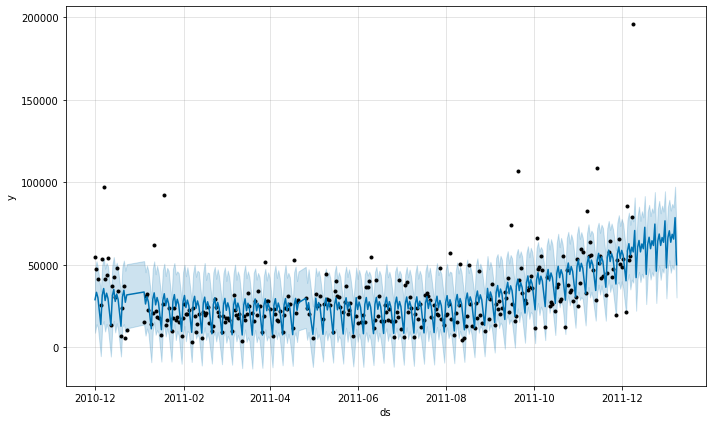

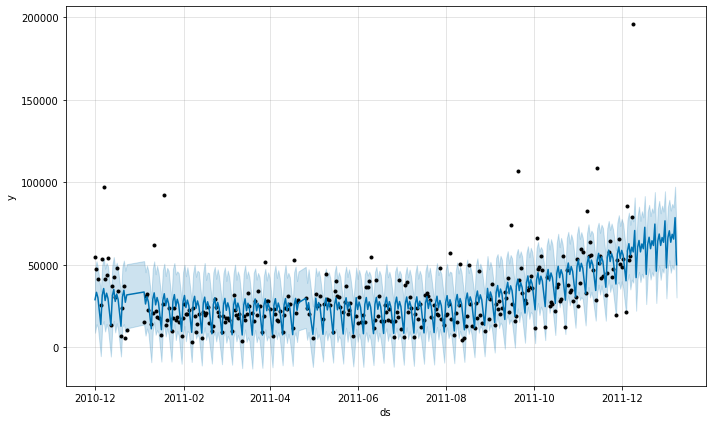

In [20]:
m.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf51rpdfd/ldt607lo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf51rpdfd/bynzkspe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30557', 'data', 'file=/tmp/tmpf51rpdfd/ldt607lo.json', 'init=/tmp/tmpf51rpdfd/bynzkspe.json', 'output', 'file=/tmp/tmpf51rpdfd/prophet_model5fm_za_9/prophet_model-20221107225657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:56:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:56:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


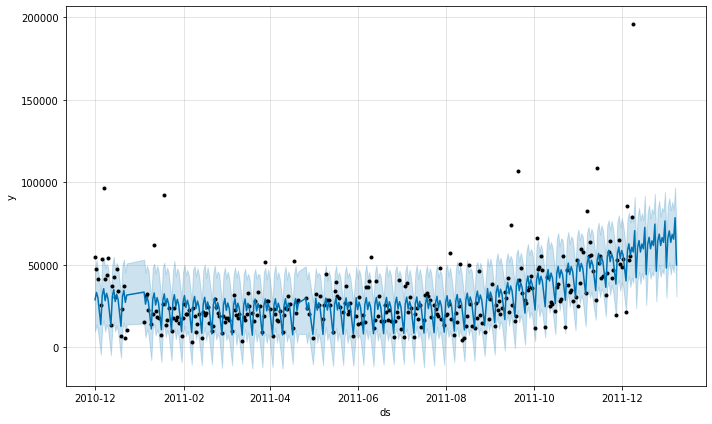

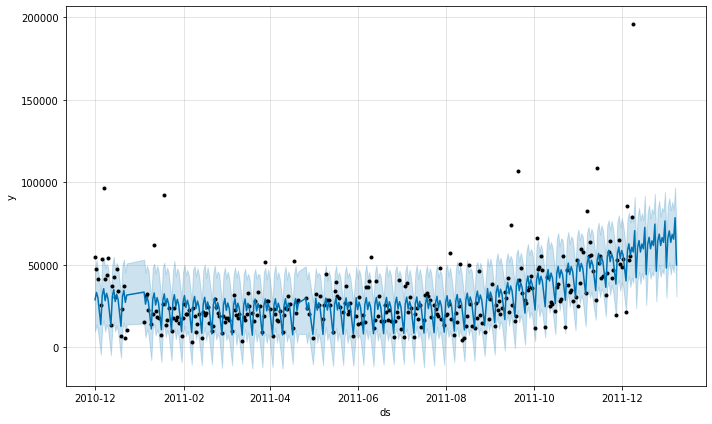

In [26]:
m = pr.Prophet(weekly_seasonality=False)
m.add_seasonality(name = 'monthly', period = 7, fourier_order=3)
forecast = m.fit(cnt).predict(future)
m.plot(forecast)

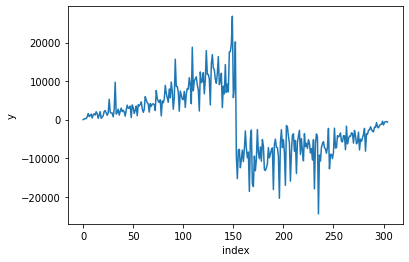

In [35]:
sns.lineplot(data = np.fft.fftfreq(len(cnt), 1/cnt['y']).reset_index(), x = 'index', y = 'y')

In [36]:
!pip install spectrum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 230 kB 9.4 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
  Created wheel for spectrum: filename=spectrum-0.8.1-cp37-cp37m-linux_x86_64.whl size=235156 sha256=aa841e0b3a87d861fc15f12d709d6e4c1adf023242cfb563b7995357ea0edca8
  Stored in directory: /root/.cache/pip/wheels/79/db/9c/92fa684ca088447807d08672e7609b48102c6161ac9c7e3c62
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=69c0b204dcc24996cb6417bd86ff9324bd6e61e4340b3022166021e72c114658
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built spectrum easydev


In [37]:
from spectrum import Periodogram, data_cosine

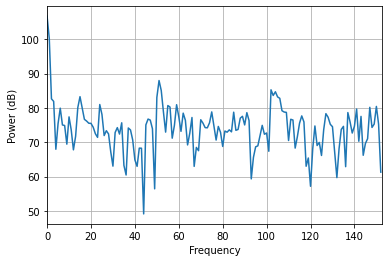

In [38]:
p = Periodogram(cnt['y'], sampling=len(cnt))
p.run()
p.plot()

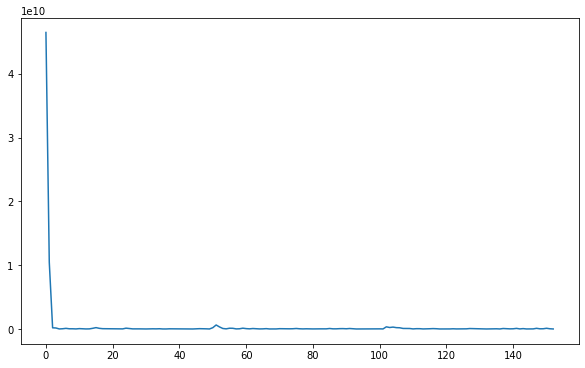

In [40]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(p.psd)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf51rpdfd/ti0h_6i0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf51rpdfd/az7l6zoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90768', 'data', 'file=/tmp/tmpf51rpdfd/ti0h_6i0.json', 'init=/tmp/tmpf51rpdfd/az7l6zoc.json', 'output', 'file=/tmp/tmpf51rpdfd/prophet_modelq19cz3vy/prophet_model-20221107230945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


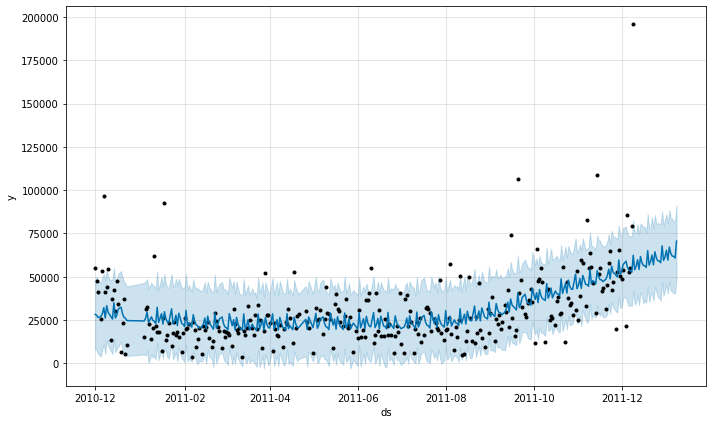

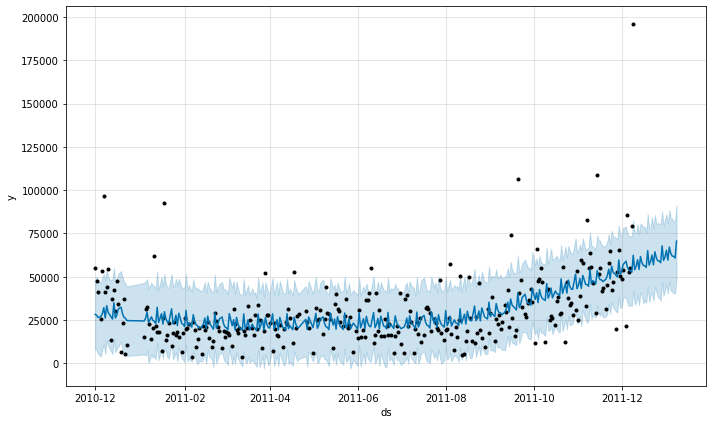

In [46]:
m = pr.Prophet(weekly_seasonality=False)
m.add_seasonality(name = 'monthly', period = 10, fourier_order=10)
forecast = m.fit(cnt).predict(future)
m.plot(forecast)

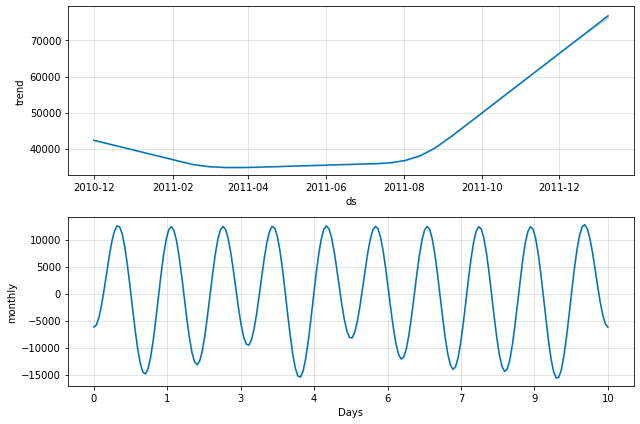

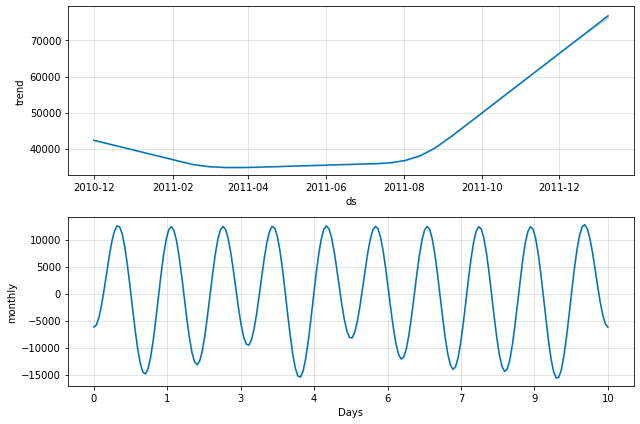

In [47]:
m.plot_components(forecast)

# Iterator

In [48]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [52]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}